In [1]:
#import torch and device

import torch
from torch import nn
import torchvision

if( torch.cuda.is_available()):
    device="cuda"
else:
    device="cpu"
device

'cuda'

In [2]:
!nvidia-smi

Sun Sep 10 17:07:33 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.98                 Driver Version: 535.98       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650 Ti     Off | 00000000:01:00.0 Off |                  N/A |
| N/A   54C    P8               1W /  50W |      5MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
print("hello")

hello


In [4]:
import zipfile
from pathlib import Path

data_path= Path("../archive")
image_path = data_path / ""

In [5]:
from torchvision import datasets, transforms

path1=r"C:\Desktop files\amaan files\BMS stuff\4th SEM\python_programming\python_project\New Plant Diseases Dataset(Augmented)"
path2="../data/data/New Plant Diseases Dataset(Augmented)"
transforms = transforms.Compose([
                                      transforms.CenterCrop(256),
                                      transforms.ToTensor()])
train_data=datasets.ImageFolder(path2+r'/train',transform=transforms)
test_data=datasets.ImageFolder(path2+r'/valid',transform=transforms)

In [6]:
BATCH_SIZE=32
train_dataloader=torch.utils.data.DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True,num_workers=4)
test_dataloader=torch.utils.data.DataLoader(test_data,batch_size=BATCH_SIZE,shuffle=True,num_workers=4)

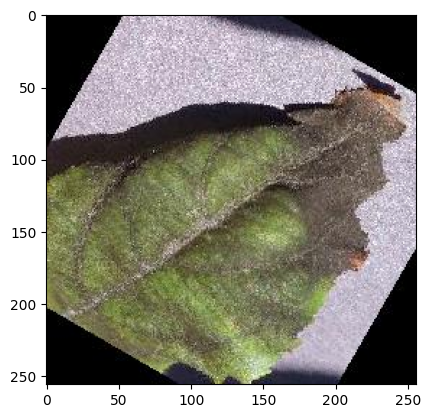

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
images,labels=next(iter(train_dataloader))

#image=mpimg.imread(train_data[0][0])
plt.imshow(torch.permute(train_data[10][0],(1,2,0)))
plt.show()

In [8]:
class_names=train_data.classes
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [9]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,accuracy_fn):
    loss,acc=0,0
    model.eval()
    confidences=[]
    with torch.inference_mode():
        for X,y in data_loader:
            y_pred= model(X.to(device))
            confidences.append(y_pred*100)
            loss+= loss_fn(y_pred.to(device),y.to(device))
            acc+= accuracy_fn(y_true=y.to(device),y_pred=y_pred.argmax(dim=1).to(device))
        
        # scale loss and acc to find average loss/acc per batch

        loss/=len(data_loader)
        acc/=len(data_loader)
        print(confidences)
    return {"model_name":model.__class__.__name__,# only works when model was created with class},
            "model_loss":loss.item(),
            "model_acc":acc}

In [10]:
len(train_dataloader)

2200

In [11]:
next(iter(train_dataloader))[0].shape

torch.Size([32, 3, 256, 256])

In [12]:
class CNN(nn.Module):

    #tiny VGG

    def __init__(self, input_shape:int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,
                            kernel_size=3,stride=1,padding=1), 
                            nn.SiLU(),
                            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,
                            kernel_size=3,stride=1,padding=1),
                            nn.SiLU(),
                            nn.BatchNorm2d(40),
                            nn.MaxPool2d(kernel_size=2,stride=2))
        
        self.conv_block_2=nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,
                            kernel_size=3,stride=1,padding=1), 
                            nn.SiLU(),
                            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,
                            kernel_size=3,stride=1,padding=1),
                            nn.SiLU(),
                            nn.BatchNorm2d(40),
                            nn.MaxPool2d(kernel_size=2,stride=2)
            
        )
        self.conv_block_3=nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,
                            kernel_size=3,stride=1,padding=1), 
                            nn.SiLU(),
                            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,
                            kernel_size=3,stride=1,padding=1),
                            nn.SiLU(),
                            nn.BatchNorm2d(40),
                            nn.MaxPool2d(kernel_size=2,stride=2)
            
        )
        self.conv_block_4=nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,
                            kernel_size=3,stride=1,padding=1), 
                            nn.SiLU(),
                            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,
                            kernel_size=3,stride=1,padding=1),
                            nn.SiLU(),
                            nn.BatchNorm2d(40),
                            nn.MaxPool2d(kernel_size=2,stride=2)
            
        )
        self.conv_block_5=nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,
                            kernel_size=3,stride=1,padding=1), 
                            nn.SiLU(),
                            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,
                            kernel_size=3,stride=1,padding=1),
                            nn.SiLU(),
                            nn.BatchNorm2d(40),
                            nn.MaxPool2d(kernel_size=2,stride=2)
            
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*8*8,out_features=hidden_units),
            nn.Linear(in_features=hidden_units,out_features=hidden_units),
            nn.Linear(in_features=hidden_units,out_features=hidden_units),
            nn.Linear(in_features=hidden_units,out_features=hidden_units),
            nn.Linear(in_features=hidden_units,out_features=output_shape),
            nn.Flatten(),
            #nn.Softmax()       
        )
    def forward(self,x):
        x=self.conv_block_1(x)
        #print(x.shape)
        x=self.conv_block_2(x)
        #print(x.shape)
        x=self.conv_block_3(x)
        x=self.conv_block_4(x)
        x=self.conv_block_5(x)
        x=self.classifier(x)
        return x


In [13]:
#del model_2

In [14]:
torch.manual_seed(42)

model_2= CNN(input_shape=train_data[0][0].shape[0],hidden_units=40,output_shape=len(class_names))
""" model_2=torch.load("disease_model.pth") """
""" model_2.load_state_dict(torch.load("./disease_model_state_2_test.pth")) """
""" model_2.load_state_dict(torch.load("./disease_model_state.pth")) """
model_2.to('cuda')

CNN(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): SiLU()
    (2): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): SiLU()
    (4): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): SiLU()
    (2): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): SiLU()
    (4): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): SiLU()
    (2): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): SiLU()
    (4

In [15]:
total_params = sum(p.numel() for p in model_2.parameters())
total_params

240398

In [16]:
torch.manual_seed(42)

images = torch.randn(size=(BATCH_SIZE,3,256,256))
test_image = images[0]
print(f"Image Batch Shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Tests image: \n {test_image}")
""" print(f"data image: \n {image}") """

Image Batch Shape: torch.Size([32, 3, 256, 256])
Single image shape: torch.Size([3, 256, 256])
Tests image: 
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  0.5655,  0.5058,  0.2225],
         [-0.6855,  0.5636, -1.5072,  ...,  0.4232, -0.3389,  0.5180],
         [-1.3638,  0.1930, -0.6103,  ..., -1.6034, -0.4298,  0.5762],
         ...,
         [-0.9585,  0.5171, -0.3570,  ...,  0.2735,  0.1356, -0.1452],
         [-0.2622,  1.3968,  1.4150,  ..., -0.1606, -0.7286, -1.1202],
         [-1.3984,  0.2314, -0.5390,  ...,  0.7202, -0.4233,  1.6215]],

        [[ 0.8884,  2.1160, -2.2648,  ..., -2.0298, -0.9786,  0.3763],
         [ 0.7079, -0.3105, -0.8863,  ...,  0.4637, -0.5361,  0.7034],
         [ 0.3242, -2.6224,  3.4373,  ...,  0.6398,  0.0854, -0.3558],
         ...,
         [-1.5718,  1.1344,  0.0795,  ..., -1.3917, -1.0012,  0.9979],
         [-0.1472, -1.5185,  0.4412,  ..., -0.4625,  0.9437,  0.0748],
         [ 1.5549, -0.9022,  1.1027,  ...,  0.2170,  0.6144, -0.6939]],

      

' print(f"data image: \n {image}") '

In [17]:
l1=nn.Sequential(nn.Conv2d(in_channels=3,out_channels=10,kernel_size=3,padding=1,stride=1),
                 nn.ReLU(),
nn.Conv2d(in_channels=10,out_channels=10,kernel_size=3,padding=1,stride=1),
nn.ReLU())
l2=nn.MaxPool2d(2,stride=2)
x=l1(images)
x=l2(x)
#x=l1(x)
#x=l2(x)
x.shape

torch.Size([32, 10, 128, 128])

In [18]:
l1=nn.Sequential(nn.Conv2d(in_channels=10,out_channels=10,kernel_size=3,padding=1,stride=1)
,nn.ReLU(),
nn.Conv2d(in_channels=10,out_channels=10,kernel_size=3,padding=1,stride=1)
,nn.ReLU())
l2=nn.MaxPool2d(2)
print(x.shape)
x=l1(x)
x=l2(x)
print(x.shape)
x=l1(x)
x=l2(x)
print(x.shape)
l4=nn.Flatten()
l4(x).shape

torch.Size([32, 10, 128, 128])
torch.Size([32, 10, 64, 64])
torch.Size([32, 10, 32, 32])


torch.Size([32, 10240])

In [19]:
""" for(X,y) in enumerate(train_dataloader):
    print(X,y) """

' for(X,y) in enumerate(train_dataloader):\n    print(X,y) '

In [20]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.train()
    gb=1024*4
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)
        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        acc=accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels
        train_acc += acc
        # 3. Optimizer zero grad

        optimizer.zero_grad()
        # 4. Loss backward
        loss.backward()
        # 5. Optimizer step
        optimizer.step()
        
        if(batch%100==0):
            print(f"Batch: {batch} ")
            print(f"Mem: {torch.cuda.memory_allocated()/gb}")
        print(f"train_loss: {train_loss/(batch+1)} | train_acc: {train_acc/(batch+1)}")
        del loss,y_pred

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

@torch.inference_mode()
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval() # put model in eval mode
    # Turn on inference context manager
     
    for X, y in data_loader:
        # Send data to GPU
        X, y = X.to(device), y.to(device)
        
        # 1. Forward pass
        test_pred = model(X)
        
        # 2. Calculate loss and accuracy
        test_loss += loss_fn(test_pred, y)
        test_acc += accuracy_fn(y_true=y,
            y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
        )
        
    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [21]:
def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc= (correct/len(y_pred))*100
    return acc

In [25]:
loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(),lr=0.0001)
#scheduler=torch.optim.lr_scheduler.StepLR(optimizer=optimizer,step_size=1,gamma=0.6)

In [31]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as Timer
from tqdm.auto import tqdm

#train and test model

epochs=1

for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch}\n-------")

    train_step(
        model=model_2,
        data_loader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(
        model=model_2,
        data_loader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch : 0
-------
Batch: 0 
Mem: 17402.5
train_loss: 0.07695497572422028 | train_acc: 100.0
train_loss: 0.06629353947937489 | train_acc: 100.0
train_loss: 0.052702041963736214 | train_acc: 100.0
train_loss: 0.08405292220413685 | train_acc: 98.4375
train_loss: 0.07541456967592239 | train_acc: 98.75
train_loss: 0.08501100664337476 | train_acc: 98.4375
train_loss: 0.08320961679731097 | train_acc: 98.21428571428571
train_loss: 0.0825905716046691 | train_acc: 98.4375
train_loss: 0.08064209835396872 | train_acc: 98.61111111111111
train_loss: 0.10942214801907539 | train_acc: 98.125
train_loss: 0.10208293202925812 | train_acc: 98.29545454545455
train_loss: 0.10018172565226753 | train_acc: 98.4375
train_loss: 0.09665677653482327 | train_acc: 98.5576923076923
train_loss: 0.1025624233963234 | train_acc: 97.99107142857143
train_loss: 0.0989582664022843 | train_acc: 97.91666666666667
train_loss: 0.09782531263772398 | train_acc: 98.046875
train_loss: 0.10091855037300025 | train_acc: 97.7941176470588

100%|██████████| 1/1 [12:52<00:00, 772.65s/it]

Test loss: 0.11496 | Test accuracy: 96.37%



In [33]:

model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

[tensor([[ 9.1481e+01, -5.8777e+02, -3.9190e+02,  ...,  1.2635e+03,
         -4.2396e+02,  4.4932e+02],
        [-2.3011e+00, -5.4612e+02, -5.6448e+02,  ...,  5.5464e+02,
         -5.4527e+02, -7.2861e+02],
        [ 8.1085e+02, -4.8081e+02,  6.8088e+02,  ..., -1.6170e+02,
         -1.3722e+03, -4.4473e+02],
        ...,
        [ 4.9633e+02, -3.2186e+02, -3.2869e+02,  ...,  2.5247e+02,
          7.0727e+02,  3.5924e+02],
        [ 7.2904e+02, -1.5365e+02, -9.1058e+00,  ...,  2.2097e+02,
          5.7256e+01, -4.9834e+02],
        [ 2.4815e+03,  6.8666e+02,  1.2217e+03,  ..., -1.1793e+03,
         -3.0975e+02, -8.2640e+02]], device='cuda:0'), tensor([[  157.3628,  -968.5231,   319.4690,  ...,   505.8372,    44.6251,
           306.3190],
        [  741.1677,  -235.6582,   365.1676,  ...,  -669.2704,  -461.8590,
           -77.2289],
        [  -58.9344,  -589.9956, -1125.6615,  ...,   728.1722,   -49.1628,
           101.9164],
        ...,
        [ -233.9378,   635.4719,   717.6852, 

{'model_name': 'CNN',
 'model_loss': 0.1154906302690506,
 'model_acc': 96.32954545454545}

In [30]:
torch.save(model_2.state_dict(),"disease_model_state_2_test.pth")

In [ ]:
""" torch.save(model_2,"disease_model.pth") """